# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [78]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("/content/archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [80]:
df = df.loc[df['dt'] >= '1950-01-01']

# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

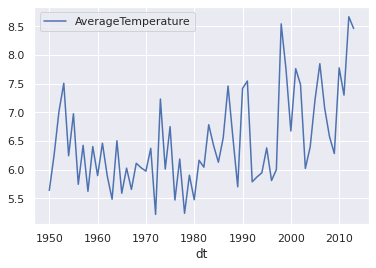

In [81]:
import seaborn as sns
sns.set()

df.loc[df['City'] == 'Toronto'].groupby([df['dt'].dt.year]).agg({'AverageTemperature' : 'mean'}).plot()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [82]:
df.groupby(['City']).agg(var=('AverageTemperature', 'var')).nlargest(columns='var', n=1).index[0]

'Harbin'

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

In [83]:
import numpy as np

df['NumLatitude'] = pd.to_numeric(df['Latitude'].str[:-1]) * np.where(df['Latitude'].str[-1] == 'N', 1, -1)
df['NumLongitude'] = pd.to_numeric(df['Longitude'].str[:-1]) * np.where(df['Longitude'].str[-1] == 'E', 1, -1)

In [84]:
df_4 = df.groupby(['City']).agg(VarTemperature=('AverageTemperature', 'var'), NumLatitude=('NumLatitude', 'mean'))

df_4

,VarTemperature,NumLatitude
City,,
Abidjan,1.872387,5.63
Addis Abeba,1.547273,8.84
Ahmadabad,17.892557,23.31
Aleppo,74.019427,36.17
Alexandria,20.874709,31.35
...,...,...
Tokyo,65.525785,36.17
Toronto,98.306119,44.20
Umm Durman,14.669129,15.27


In [85]:
df_4 = df.groupby(['City']).agg(VarTemperature=('AverageTemperature', 'var'), NumLatitude=('NumLatitude', 'mean'))
df_4['January75'] = df.loc[(df['dt'].dt.year == 1975) & (df['dt'].dt.month == 1)].set_index('City')['AverageTemperature']
df_4['July75'] = df.loc[(df['dt'].dt.year == 1975) & (df['dt'].dt.month == 7)].set_index('City')['AverageTemperature']
df_4 = df_4.set_index('NumLatitude').sort_index()
df_4

,VarTemperature,January75,July75
NumLatitude,,,
-37.78,16.174825,17.305,9.868
-34.56,4.531614,19.328,15.098
-32.95,9.192795,19.827,11.742
-32.95,22.691995,12.468,-1.101
-29.74,4.086368,22.529,17.711
...,...,...,...
50.63,91.873789,-0.440,20.142
52.24,24.957875,6.581,17.921
52.24,49.932928,5.252,19.986


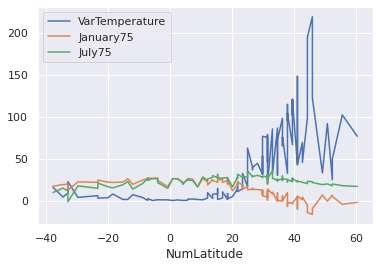

In [86]:
df_4.plot()

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

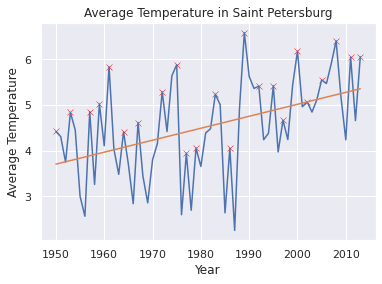

In [87]:
df_5 = df.loc[df['City'] == 'Saint Petersburg'].groupby([df['dt'].dt.year]).agg({'AverageTemperature' : 'mean'})
df_5['Label'] = np.where((df_5['AverageTemperature'] > df_5['AverageTemperature'].shift(1, fill_value=0)) & 
                            (df_5['AverageTemperature'] > df_5['AverageTemperature'].shift(-1, fill_value=0)), True, False)

df_5.plot(xlabel='Year',
            ylabel='Average Temperature',
            title='Average Temperature in Saint Petersburg',
            legend=False)

sns.scatterplot(data=df_5.loc[df_5['Label'] == True],
                x=df_5.loc[df_5['Label'] == True].index,
                y='AverageTemperature',
                legend=False,
                marker='x',
                color='red')

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(np.array(df_5.index).reshape(-1, 1), df_5.AverageTemperature)

sns.lineplot(x=df_5.index,
                y=reg.intercept_ + reg.coef_ * df_5.index,
                legend=False)

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [88]:
df_6_1 = df.groupby(['City', df['dt'].dt.year]).agg({'AverageTemperature' : 'mean'})
df_6_1 = df_6_1.groupby(['City']).agg(min=('AverageTemperature', 'min'), max=('AverageTemperature', 'max'))
df_6_1['diff'] = np.abs(df_6_1['max'] - df_6_1['min'])
df_6_1.nlargest(columns='diff', n=1).index[0]

'Mashhad'

In [89]:

df_6_2 = df.loc[df['dt'].dt.month == 1].groupby(['City']).agg(January=('AverageTemperature', 'mean'))
df_6_2['July'] = df.loc[df['dt'].dt.month == 7].groupby(['City']).agg(July=('AverageTemperature', 'mean'))['July']
df_6_2['diff'] = np.abs(df_6_2['January'] - df_6_2['July'])
df_6_2.nlargest(columns='diff', n=1).index[0]

'Harbin'

In [90]:
df_6_2 = df.copy()

df_6_2['dt'] = df_6_2['dt'].dt.year
df_6_2 = df_6_2.drop(['AverageTemperature', 'AverageTemperatureUncertainty', 'Country', 'Latitude', 'Longitude',
                        'NumLatitude', 'NumLongitude'], axis=1)
df_6_2 = df_6_2.drop_duplicates()
df_6_2 = df_6_2.set_index(['City', 'dt'])

df_6_2b = df.copy()
df_6_2b = df_6_2b.loc[df_6_2b['dt'].dt.month == 1]
df_6_2b['dt'] = df_6_2b['dt'].dt.year
df_6_2['January'] = df_6_2b.set_index(['City', 'dt'])['AverageTemperature']

df_6_2b = df.copy()
df_6_2b = df_6_2b.loc[df_6_2b['dt'].dt.month == 7]
df_6_2b['dt'] = df_6_2b['dt'].dt.year
df_6_2['July'] = df_6_2b.set_index(['City', 'dt'])['AverageTemperature']

df_6_2['diff'] = np.abs(df_6_2['January'] - df_6_2['July'])

df_6_2 = df_6_2.groupby(['City']).agg({'diff' : 'mean'})
df_6_2.nlargest(columns='diff', n=1).index[0]

'Harbin'

In [91]:
df_6_3 = df.loc[df['AverageTemperature'] < 0]
df_6_3 = df_6_3.groupby(['City', df_6_3['dt'].dt.year]).agg(count=('AverageTemperature', 'count'))
df_6_3 = df_6_3.groupby(['City']).agg(mean=('count', 'mean'))
df_6_3.nlargest(columns='mean', n=1).index[0]

'Harbin'

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


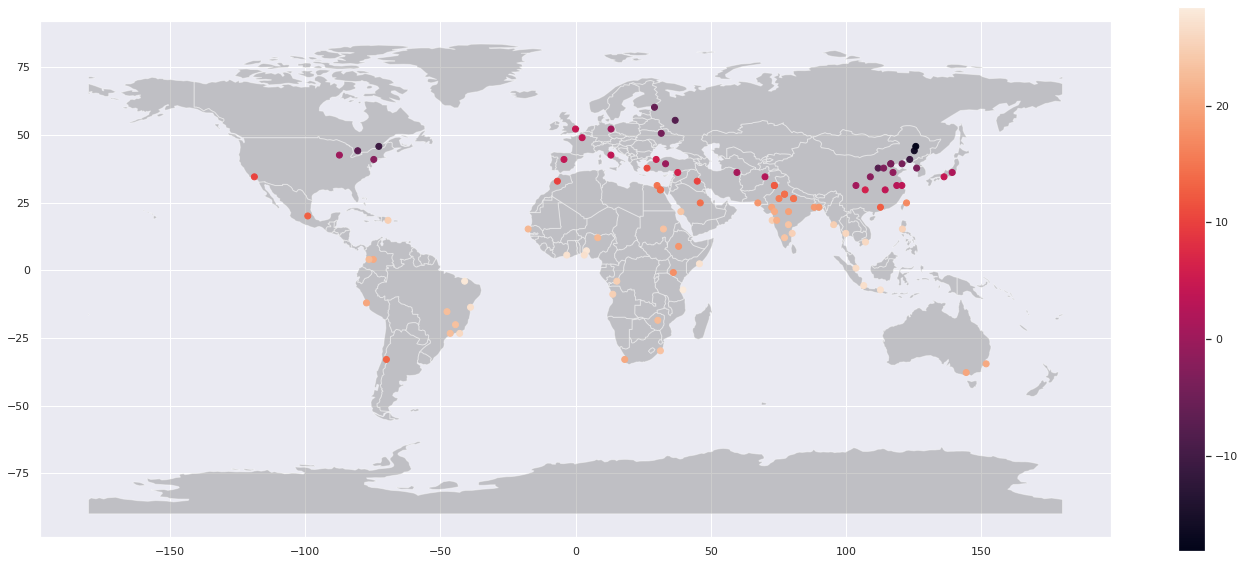

In [93]:
!pip install geopandas
import geopandas
import folium


df_7 = df.loc[(df['dt'] >= '2003-01-01') & (df['dt'].dt.month == 1)]

df_7 = df_7.groupby(['City']).agg(AvgTempJan=('AverageTemperature', 'mean'))

dt_7b = df.drop(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty',
                    'Country', 'Latitude', 'Longitude'], axis=1).drop_duplicates().set_index(['City'])

df_7['Latitude'] = dt_7b['NumLatitude']
df_7['Longitude'] = dt_7b['NumLongitude']


geometry = geopandas.points_from_xy(df_7.Longitude, df_7.Latitude)

geo_df = geopandas.GeoDataFrame(df_7, geometry=geometry)


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(24, 10))
world.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(column='AvgTempJan', ax=ax, legend=True)